Analysis of features
====================

5 groups of features
1. Flow
2. Clustering
3. Node Importance
4. Breeding Habitat Location
5. Neighbour effect

### Getting the data
Raw data and processed data are stored in the Data folder. util.py will access the storage to generate feature tables if the graphs have been processed and stored previously. Otherwise, shapefiles and csv files will be used to generate networkx graph with features as node attributes.

In [2]:
# getting data
from train import *
list_ = ["20160523", "20160524", "20160525", "20160527", "20160531", "20160601", "20160602"]

predmove = False
X, y = build_X_y(list_, study_period=3, ahead=2, delta=True, pred_movement=predmove, daily = False) # basic + daily

unpacked 20160523
unpacked 20160524
unpacked 20160525
unpacked 20160527
unpacked 20160531
unpacked 20160601
unpacked 20160602
Built basic features for day 1
Built basic features for day 2
Built basic features for day 3
Built basic features for day 4
Built basic features for day 5
Built basic features for day 6
Built basic features for day 7


In [3]:
col = ['EC', 'BC', 'PR', 'hub', 'authority','population', 'pop_density', 'bh_density','proximity', 'bh_count', 'clustering', 
       'BNI' ,'BNO', 'BNI2','BNO2','region_1', 'region_2', 'region_3', 'region_4',
       'd_BNI', 'd_BNO', 'd_BNI2', 'd_BNO2','d_EC', 'd_BC','d_PR', 
       'd_hub','d_authority','d_bh_density', 'd_bh_count', 'd_proximity']

df1 = pd.read_csv("/Users/sylvesterchin/GraphingProblem/Data/Processed/Storage_subzone/20160531graph.csv")
df2 = pd.read_csv("/Users/sylvesterchin/GraphingProblem/Data/Processed/Storage_subzone/20160601graph.csv")
df3 = pd.read_csv("/Users/sylvesterchin/GraphingProblem/Data/Processed/Storage_subzone/20160602graph.csv")
sumdf = pd.concat([df1,df2,df3], ignore_index=True)
value = pd.DataFrame(sumdf['weight'])
regx = pd.DataFrame(sumdf['region'])

X1 = pd.DataFrame(X, columns = col)
y1 = pd.DataFrame(y, columns = ['label'])
print value.shape
print X.shape
print y.shape
df  = pd.concat([y1, value, regx, X1], axis=1)

(945, 1)
(945, 31)
(945,)


In [4]:
df.head()

,label,weight,region,EC,BC,PR,hub,authority,population,pop_density,...,d_BNI2,d_BNO2,d_EC,d_BC,d_PR,d_hub,d_authority,d_bh_density,d_bh_count,d_proximity
0,1,3.0,North,0.063216,0.000810,0.003620,0.002671,0.003857,10.0,0.267892,...,0.000167,0.453145,-0.000838,-0.000129,-0.000051,-0.000037,-0.000080,0.0,0.0,-1.765513e-09
1,1,6.0,North,0.059959,0.000538,0.003388,0.002545,0.002863,26860.0,19162.519820,...,0.000110,0.539441,0.000503,0.000202,0.000040,-0.000060,-0.000076,6.0,3.0,2.550603e-03
2,0,0.0,Central,0.059374,0.000469,0.003364,0.002502,0.002946,20.0,8.879548,...,0.000048,0.588941,-0.000028,0.000005,0.000002,-0.000097,-0.000043,3.0,0.0,4.628612e-06
3,1,0.0,Central,0.063539,0.000920,0.003654,0.016941,0.016844,41710.0,14026.389072,...,0.000321,-0.163893,-0.000460,0.000079,-0.000029,-0.000036,-0.000422,2.0,0.0,9.506634e-03
4,1,0.0,Central,0.061819,0.000612,0.003518,0.003433,0.003708,10760.0,23996.249562,...,0.000245,0.419937,-0.000785,-0.000025,-0.000032,-0.000118,-0.000148,-1.0,0.0,-2.890367e-04


## FLOW
Hyperlink-Induced Topic Search (HITS; also known as hubs and authorities) is a link analysis algorithm that rates Web pages, developed by Jon Kleinberg. 

The idea behind Hubs and Authorities stemmed from a particular insight into the creation of web pages when the Internet was originally forming. A good hub represented a page that pointed to many other pages, and a good authority represented a page that was linked by many different hubs.

Using networkx HITS algorithm, hub and authority scores were generated to be studied.

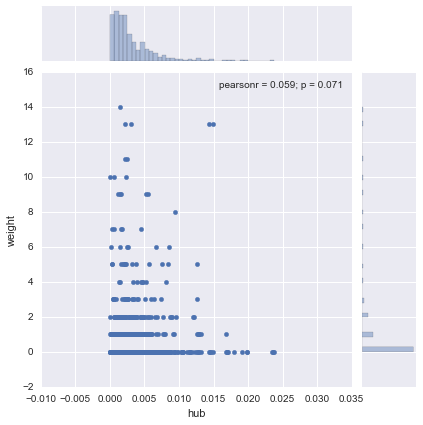

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.jointplot(x="hub", y='weight', data=df)

## Clustering
Clustering by region
* 5 URA regions would be encoded as 4 variables
* using pandas getdummies() method

Networkx clustering coefficient
* For weighted graphs, the clustering is defined as the geometric average of the subgraph edge weights
* http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering

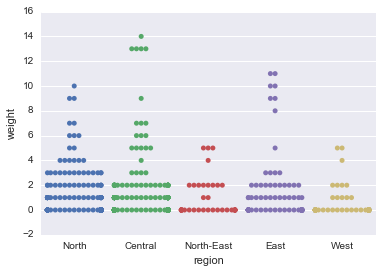

In [6]:
sns.swarmplot(x='region', y='weight', data=df)

## Node Importance
PageRank
* Originally used to measure importance of websites based on number and quality (weights) of links
* Can be re-applied to other network based problems

Centrality
* Betweenness centrality – calculates the strength of a node as a middleman for other nodes
* Eigenvector centrality – similar concept as PageRank


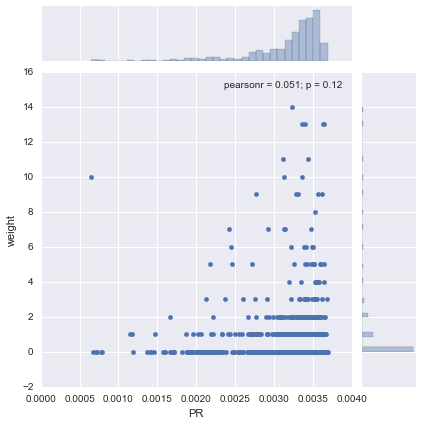

In [7]:
sns.jointplot(x='PR', y='weight', data=df, xlim=(0,0.004))

## Breeding habitat 
1. Proximity
    * Inverse distance of 10 nearest BH
2. Density
    * Number of BH within 2.5km radius (maximum adult mosquito flight range of 2.5 km)
    * *Palaniyandi, M. (2012, December). The role of Remote Sensing and GIS for spatial prediction of vector-borne diseases transmission: A systematic review. J Vector Borne Dis, 197-204*
3. Per Subzone Count
    * Number of BH within subzone


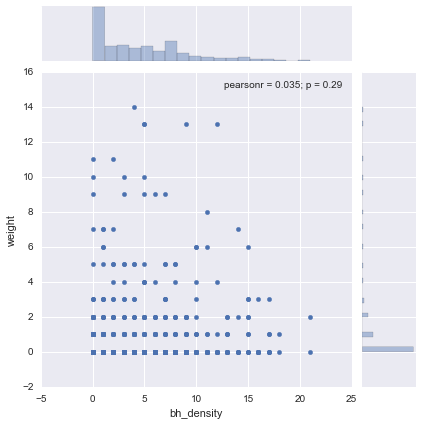

In [8]:
sns.jointplot(x='bh_density', y='weight', data=df)

## Neighbouring Effect

Bad Neighbours refers to the sources(i) that have high amount of dengue cases and send sizeable amount of people to the target(j) or targets which have high breeding habitat density which might be a factor in dengue outbreaks.

#### a. Bad Neighbour In

This refers to the effects of neighbouring active subzone j sending high volume of people to subzone i.

$$ BNI_{i} = w_{ji} * C_{i} *  e^{d_{ij}}$$
where $$w_{ji} = \frac{f_{ji}}{\sum_{k=1}^{N} f_{ki}} $$

N refers to the total number of nodes in the system except *i*. *f* refers to the normalised edge frequency and C refers to the case number at subzone *i*.

#### b. Bad Neighbour Out

This refers to the effects of neighbouring BH-dense subzones infecting people that subzone i sent out. The underlying assumption is that the outgoing people from subzone i will return to subzone i as their "home".

$$BNO_{i} = \sum_{j=1}^{N} w_{ij} * e^{BHD_{j}/BHP_{j}}$$
where $$w_{ij} = \frac{f_{ij}}{\sum_{k=1}^{N} f_{ik}} $$


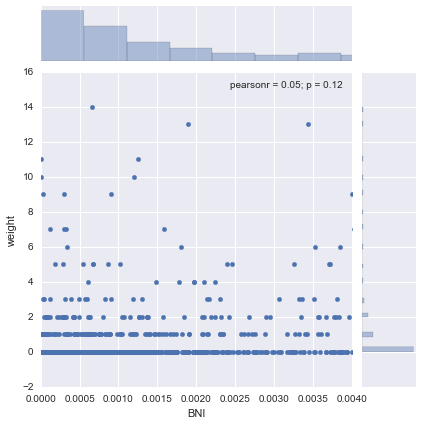

In [9]:
sns.jointplot(x='BNI', y='weight', data=df, xlim=(0,0.004))

# Model Building

Pipeline consists of:
* scaler by minimum and maximum value
* feature selecting by chi-squared scoring
* learning algorithm

Models have parameters *class_weight* set to 'balanced' to handle the inbalanced dataset. 

In [28]:
## sample pipeline
def log_reg_model():
    # for predicting movement
    select = SelectPercentile(score_func=chi2, percentile=65) 
    log = LogisticRegression(class_weight='balanced', penalty='l2', tol=1e-8, C=64) 
    scaler = MinMaxScaler()
    
    # for predicting status
    select_status = SelectPercentile(score_func=chi2, percentile=41)
    log_status = LogisticRegression(class_weight='balanced', penalty='l2', tol=0.1, C=0.16)

    pipeline1 = Pipeline([('scale', scaler), ('select', select_status), ('logre', log_status)])
    pipeline2 = Pipeline([('scale', scaler), ('select', select), ('logre', log)])
    return (pipeline1, pipeline1)

## Results
f1_macro scoring was used to balance the inbalanced classes which was split 85/15. F1 is a geometric average of precision and recall which is a far better metric to use than accuracy. 

#### *Explanation*

Given an example of identifying cats and dogs from their fur.  
Precision = How many selected items are actually relevant? (how many dogs you identified are actually dogs)  
Recall = How many relevant items are actually selected? (how many dogs are identified, out of all the dogs)  
Accuracy = How many correct identification?  

F1 = 2 * (precision * recall) / (precision + recall)

In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results.

refer to : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

A dummy classifier was used to simulate a brute-force approach of blindly classifying every observation under the label for the majority. 

In [31]:
# predmove true means you're trying to predict movement, false means predicting status
apply_model(X,y,"f1_macro", ensemble=True,predmove=predmove)
run_stack(X, y)

Dummy
CV score (f1_macro): 0.4127 (+/- 0.00)
[ 0.41176471  0.41304348  0.41304348  0.41304348  0.4125    ]
Classification Report:
             precision    recall  f1-score   support

          0       0.71      1.00      0.83       135
          1       0.00      0.00      0.00        54

avg / total       0.51      0.71      0.60       189

0.0
Confusion Matrix:
[[135   0]
 [ 54   0]]
 
 
LogisticRegression
CV score (f1_macro): 0.7388 (+/- 0.02)
[ 0.74462366  0.73865646  0.73596647  0.74891304  0.72581429]
Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.79      0.84       135
          1       0.60      0.81      0.69        54

avg / total       0.82      0.79      0.80       189

0.692913385827
Confusion Matrix:
[[106  29]
 [ 10  44]]
 
 
LinearSVC
CV score (f1_macro): 0.7432 (+/- 0.03)
[ 0.75560784  0.72894394  0.74088953  0.76718404  0.72337573]
Classification Report:
             precision    recall  f1-score   support



## Notable findings
Most of the features that contribute to the model required StarHub's connectivity data. 3 of the top contributers are:
* hub-score
* BNI-score
* population size

By plotting a 3-d plot, we can observe how the dengue activity varies with the 3 features. 

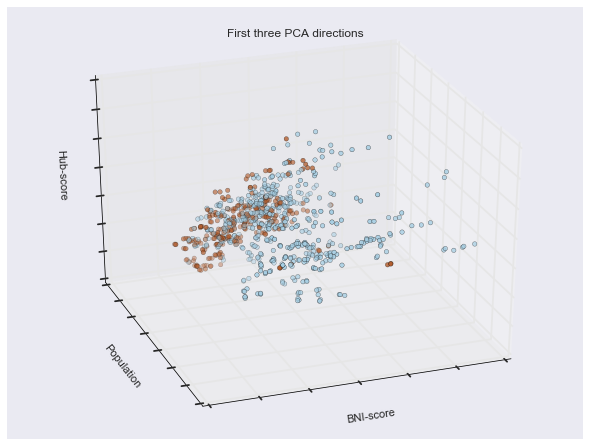

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(np.log(df['BNI']), np.log(df['population']), np.log(df['hub']), c=y, cmap=plt.cm.Paired)

ax.set_title("First three PCA directions")
ax.set_xlabel("BNI-score")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Population")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Hub-score")
ax.w_zaxis.set_ticklabels([])
plt.show()

## Conclusion
Most important feature requires edge-weights of the graph as a component. Hence connectivity data is vital for building predictive models for dengue transmission. 
